# Import libraries

In [51]:
import numpy as np
import scipy as scp
import matplotlib.pyplot as plt

# Define constants

In [52]:
c = 299792.458
H0 = 75
f0 = 6.61* 10**-9 * 10**(-7) * (3.2408*10**(-25))**(-2)
megaparsec = 3.0856775814913673 * 10**10

# Some key functions

In [53]:
def scale_factor(z):
    return 1/(1+z)

#for nearby SN

def co_moving_dist_near(z):
    return c*z/H0

def mag_model_near(z, Lpl):
    rc = co_moving_dist_near(z)
    flux = Lpl/(4*np.pi*((rc)**2))
    argument = flux/f0
    mag = -2.5*np.log10(argument)
    return mag

#for far away SN
def Friedmann_eq(z, omega_DE):
    omega_M = 1 - omega_DE
    a = scale_factor(z)
    return H0*np.sqrt(omega_M/(a**3) + omega_DE + (1-omega_M-omega_DE)/(a**2))

def integrand(z, omega_DE):
    return c/Friedmann_eq(z, omega_DE)

def co_moving_dist(z_up, omega_DE):
    dist, err = scp.integrate.quad(integrand, 0, z_up, args = (omega_DE))
    return dist

def mag_model(z, omega_DE):
    rc = co_moving_dist(z, omega_DE)
    flux = LPeakLambda/(4*np.pi*(rc**2)*((1+z)**2))
    argument = flux/f0
    mag = -2.5*np.log10(argument)
    return mag

# Load the data

In [54]:
sn_z_near, sn_mag_near, sn_mag_err_near =  np.loadtxt("sn_data_nearby.txt", unpack = True, usecols=(1,2,3))
sn_z_far, sn_mag_far, sn_mag_err_far =  np.loadtxt("sn_data_distant.txt", usecols=(1,2,3), unpack = True)
sn_z, sn_mag, sn_mag_err = np.loadtxt("sn_data.txt", usecols=(1,2,3), unpack = True)



# Chi squared mininimisation to find peak luminosity

minimum chi-squared value is 23.80696187411767, and occurs at a peak luminosity of 2.9564564564564565e+32 for 18 degrees of freedom


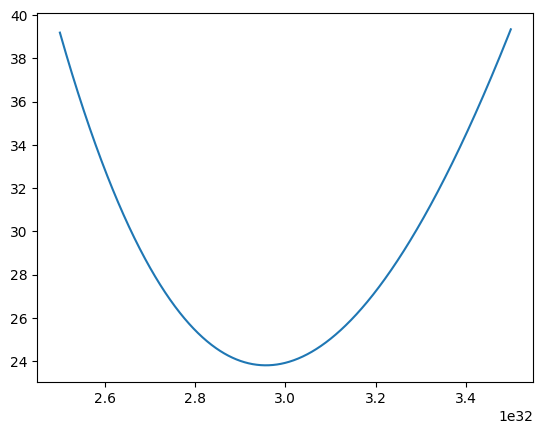

In [55]:
trial_Lpl_vals = np.linspace(2.5*10**32,3.5*10**32,1000)
#print(trial_DE_vals)
DoF = sn_z_near.size
chisquared_vals = np.zeros(len(trial_Lpl_vals))
i1 = 0
for trial_Lpl in trial_Lpl_vals:
    #print(f"\ntrial value: {trial_DE}")
    for i2 in range(len(sn_z_near)):
        redshift = sn_z_near[i2]
        mag_predicted = mag_model_near(redshift, trial_Lpl)
        mag_actual = sn_mag_near[i2]
        mag_actual_err = sn_mag_err_near[i2]
        sq_norm_resid = ((mag_predicted-mag_actual)/mag_actual_err)**2
        chisquared_vals[i1] += sq_norm_resid
        #print(f"redshift: {redshift}, mag_pred: {mag_predicted}, mag_act: {mag_actual}, chisq: {sq_norm_resid}, tally: {chisquared_vals[i1]}")
    i1 += 1
#print(chisquared_vals)
index_min_chisq = np.argmin(chisquared_vals)
min_chisq_val = chisquared_vals[index_min_chisq]
optimised_Lpl = trial_Lpl_vals[index_min_chisq]
LPeakLambda = optimised_Lpl
print(f"minimum chi-squared value is {min_chisq_val}, and occurs at a peak luminosity of {optimised_Lpl} for {DoF} degrees of freedom")
plt.figure()
plt.plot(trial_Lpl_vals, chisquared_vals)
plt.show()

# Plotting mag-redshift data for nearby SNIa

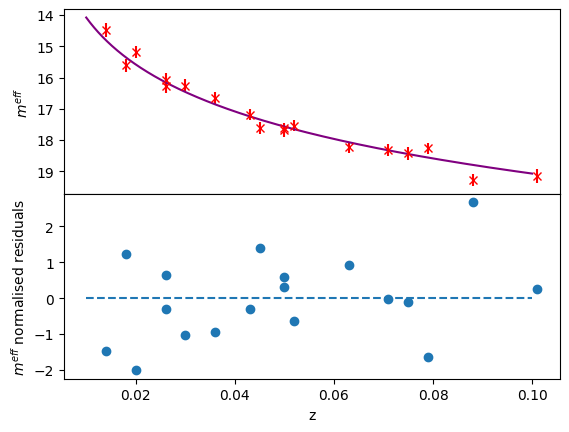

In [56]:
def zero_funct(x):
    return 0*x
trial_z = np.linspace(0.01, 0.1, 1000)
trial_mag = mag_model_near(trial_z, LPeakLambda)

norm_resid = (sn_mag_near - mag_model_near(sn_z_near, LPeakLambda))/sn_mag_err_near
fig, axs = plt.subplots(2, 1, sharex = True)
axs[0].errorbar(sn_z_near, sn_mag_near, yerr=sn_mag_err_near, marker = "x", linestyle = 'None', color = "red")
axs[0].plot(trial_z, trial_mag, color = "purple")
#axs[0].errorbar(sn_z_far, sn_mag_far, yerr=sn_mag_err_far, marker = "x", linestyle = 'None', color = "blue", label = "distant SN")
axs[1].scatter(sn_z_near, norm_resid)
axs[1].plot(trial_z, zero_funct(trial_z), linestyle = "dashed")
plt.xlabel("z")
axs[0].set_ylabel("${m^{eff}}$")
plt.ylabel("${m^{eff}}$ normalised residuals")
fig.subplots_adjust(hspace=0)
#axs[0].legend()
axs[0].invert_yaxis()
plt.savefig("effMagNearby-redshift-normResid-graph")
plt.show()

# Finding energy densities: distant SN only

minimum chi-squared value is 81.6028294584763, and occurs at a dark energy density of 0.5621621621621622 for 42 degrees of freedom


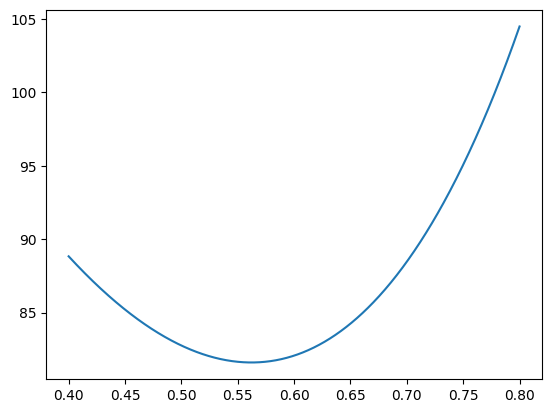

In [57]:
trial_DE_vals = np.linspace(0.4,0.8,1000)
#print(trial_DE_vals)
DoF = sn_z_far.size
chisquared_vals = np.zeros(len(trial_DE_vals))
i1 = 0
for trial_DE in trial_DE_vals:
    #print(f"\ntrial value: {trial_DE}")
    for i2 in range(len(sn_z_far)):
        redshift = sn_z_far[i2]
        mag_predicted = mag_model(redshift, trial_DE)
        mag_actual = sn_mag_far[i2]
        mag_actual_err = sn_mag_err_far[i2]
        sq_norm_resid = ((mag_predicted - mag_actual)/mag_actual_err)**2
        chisquared_vals[i1] += sq_norm_resid
        #print(f"redshift: {redshift}, mag_pred: {mag_predicted}, mag_act: {mag_actual}, chisq: {sq_norm_resid}, tally: {chisquared_vals[i1]}")
    i1 += 1
#print(chisquared_vals)
index_min_chisq = np.argmin(chisquared_vals)
min_chisq_val = chisquared_vals[index_min_chisq]
optimised_DE = trial_DE_vals[index_min_chisq]
print(f"minimum chi-squared value is {min_chisq_val}, and occurs at a dark energy density of {optimised_DE} for {DoF} degrees of freedom")
plt.figure()
plt.plot(trial_DE_vals, chisquared_vals)
plt.show()
OmegaLambda = optimised_DE



# Finding the energy densities: all SN

In [ ]:
trial_DE_vals = np.linspace(0.2,0.8,1000)
#print(trial_DE_vals)
DoF = sn_z.size
chisquared_vals = np.zeros(len(trial_DE_vals))
i1 = 0
for trial_DE in trial_DE_vals:
    #print(f"\ntrial value: {trial_DE}")
    for i2 in range(len(sn_z)):
        redshift = sn_z[i2]
        mag_predicted = mag_model(redshift, trial_DE)
        mag_actual = sn_mag[i2]
        mag_actual_err = sn_mag_err[i2]
        sq_norm_resid = ((mag_predicted - mag_actual)/mag_actual_err)**2
        chisquared_vals[i1] += sq_norm_resid
        #print(f"redshift: {redshift}, mag_pred: {mag_predicted}, mag_act: {mag_actual}, chisq: {sq_norm_resid}, tally: {chisquared_vals[i1]}")
    i1 += 1
#print(chisquared_vals)
index_min_chisq = np.argmin(chisquared_vals)
min_chisq_val = chisquared_vals[index_min_chisq]
optimised_DE2 = trial_DE_vals[index_min_chisq]
greaterchisq = chisquared_vals[index_min_chisq:]
lowerchisq = chisquared_vals[:index_min_chisq]
lower_err_index = lowerchisq[lowerchisq>(min_chisq_val-1)]
upper_err_index = np.argmax(greaterchisq>=min_chisq_val+1) + index_min_chisq
print(lower_err_index)
print(trial_DE_vals[upper_err_index])
#print(greaterchisq)
#print(chisquared_vals)
print(f"Minimum chi-squared value is {min_chisq_val}, and occurs at a dark energy density of {optimised_DE2} for {DoF} degrees of freedom")
plt.figure()
plt.plot(trial_DE_vals, chisquared_vals)
plt.show()



IndexError: boolean index did not match indexed array along dimension 0; dimension is 1000 but corresponding boolean dimension is 593

# Plotting magnitude-redshift curve for all data

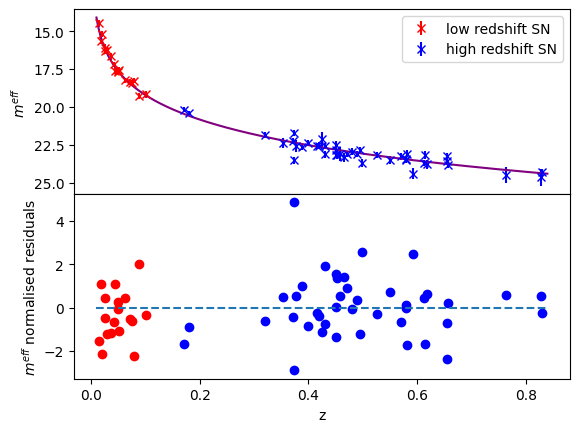

In [59]:
def zero_funct(x):
    return 0*x
trial_z = np.linspace(0.01, 0.84, 1000)
trial_mag = np.zeros(len(trial_z))
i3 = 0
for trial_redshift in trial_z:
    trial_mag[i3] = mag_model(trial_redshift, OmegaLambda)
    i3 += 1
norm_resid_near = np.zeros(len(sn_z_near))
i4 = 0
for trial_redshift2 in sn_z_near:
    norm_resid_near[i4] = (sn_mag_near[i4] - mag_model(trial_redshift2, OmegaLambda))/sn_mag_err_near[i4]
    i4 += 1
norm_resid_far = np.zeros(len(sn_z_far))
i5 = 0
for trial_redshift3 in sn_z_far:
    norm_resid_far[i5] = (sn_mag_far[i5] - mag_model(trial_redshift3, OmegaLambda))/sn_mag_err_far[i5]
    i5 += 1

fig, axs = plt.subplots(2, 1, sharex = True)
axs[0].errorbar(sn_z_near, sn_mag_near, yerr=sn_mag_err_near, marker = "x", linestyle = 'None', color = "red", label = "low redshift SN")
axs[0].errorbar(sn_z_far, sn_mag_far, yerr = sn_mag_err_far, marker = "x", linestyle = "None", color = "blue", label = "high redshift SN")
axs[0].plot(trial_z, trial_mag, color = "purple")
#axs[0].errorbar(sn_z_far, sn_mag_far, yerr=sn_mag_err_far, marker = "x", linestyle = 'None', color = "blue", label = "distant SN")
axs[1].scatter(sn_z_near, norm_resid_near, color = "red")
axs[1].scatter(sn_z_far, norm_resid_far, color = "blue")
axs[1].plot(trial_z, zero_funct(trial_z), linestyle = "dashed")
plt.xlabel("z")
axs[0].set_ylabel("${m^{eff}}$")
plt.ylabel("${m^{eff}}$ normalised residuals")
fig.subplots_adjust(hspace=0)
axs[0].legend()
axs[0].invert_yaxis()
plt.savefig("effMagNearby-redshift-normResid-graph")
plt.show()